### Testing PatchBasedInference.py

In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = [20, 40]

In [113]:
import torch
import numpy as np
import torchio as tio
from skimage.util import compare_images
from radio.data import PatchBasedInference

In [71]:
image_name = 't1'
subject = tio.datasets.Colin27()
in_dataset = tio.SubjectsDataset([subject])
model = torch.nn.Identity()
patch_size = (96, 96, 1)
patch_batch_size = 16
patch_overlap = (2, 2, 0)

#### Test ``overlap_mode = 'crop'``

In [72]:
overlap_mode = 'crop'

In [73]:
inference_module = PatchBasedInference(
    patch_size=patch_size,
    patch_batch_size=patch_batch_size,
    patch_overlap=patch_overlap,
    overlap_mode=overlap_mode,
)   

In [74]:
out_dataset = inference_module(
    in_dataset,
    model,
    modalities=[image_name],
)

#### Plot Example Samples from Batches

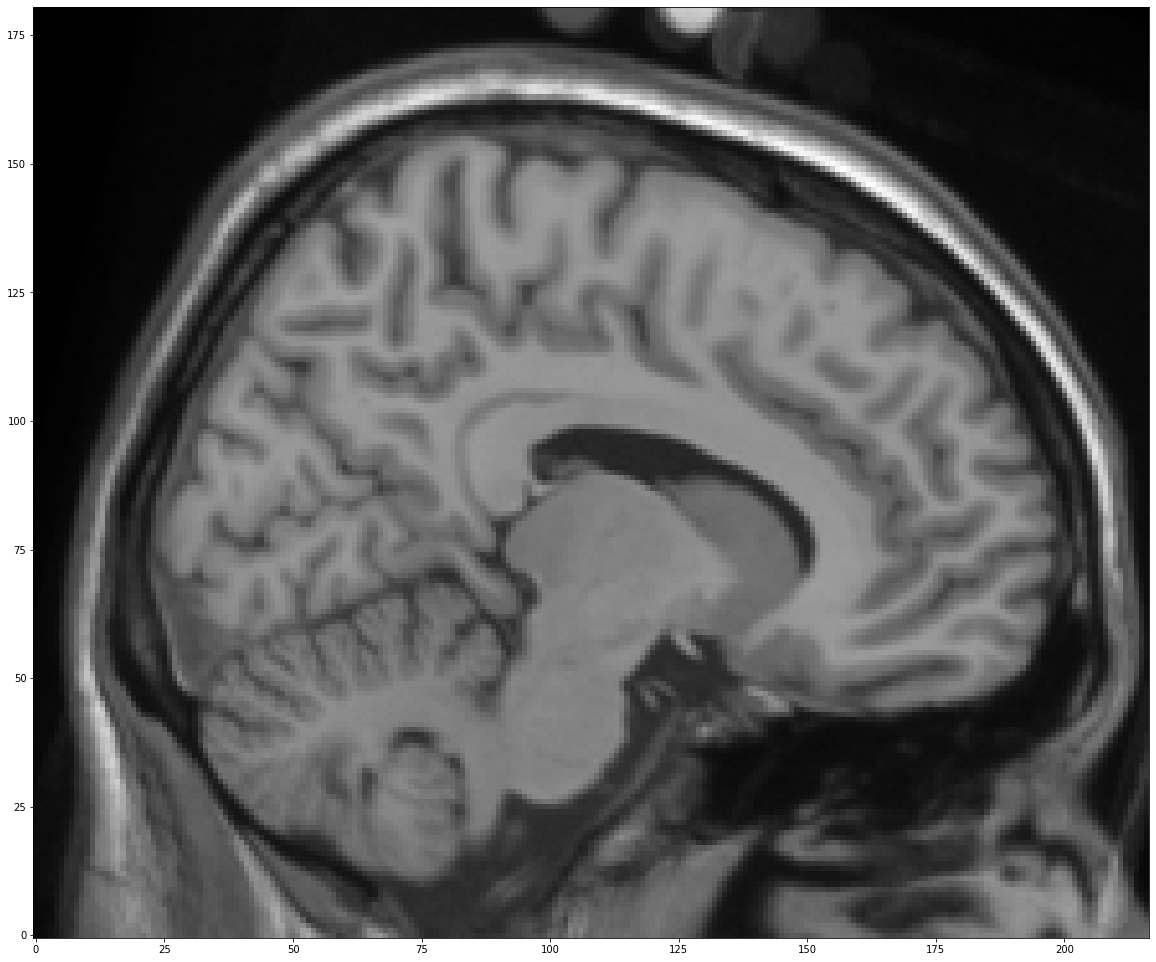

In [101]:
sample_in = in_dataset[0]
data_in = sample_in['t1'].numpy()[0]
n_slice = 100
prettier_slice_in = np.rot90(np.fliplr(data_in[n_slice]))
plt.imshow(prettier_slice_in, cmap='gray', origin='lower')
plt.show()

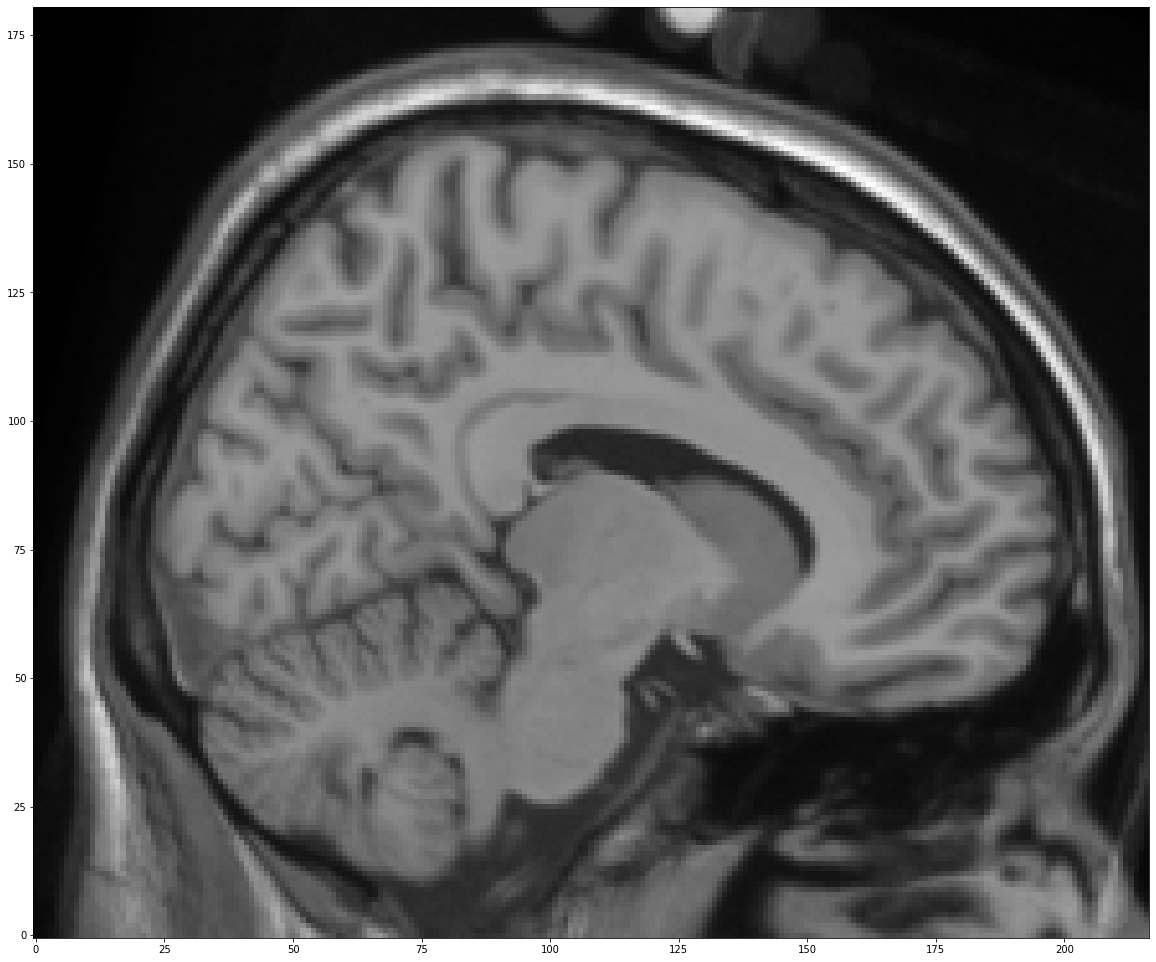

In [111]:
sample_out = out_dataset[0]
data_out = sample_out['t1'].numpy()[0]
n_slice = 100
prettier_slice_out = np.rot90(np.fliplr(data_out[n_slice]))
plt.imshow(prettier_slice_out, cmap='gray', origin='lower')
plt.show()

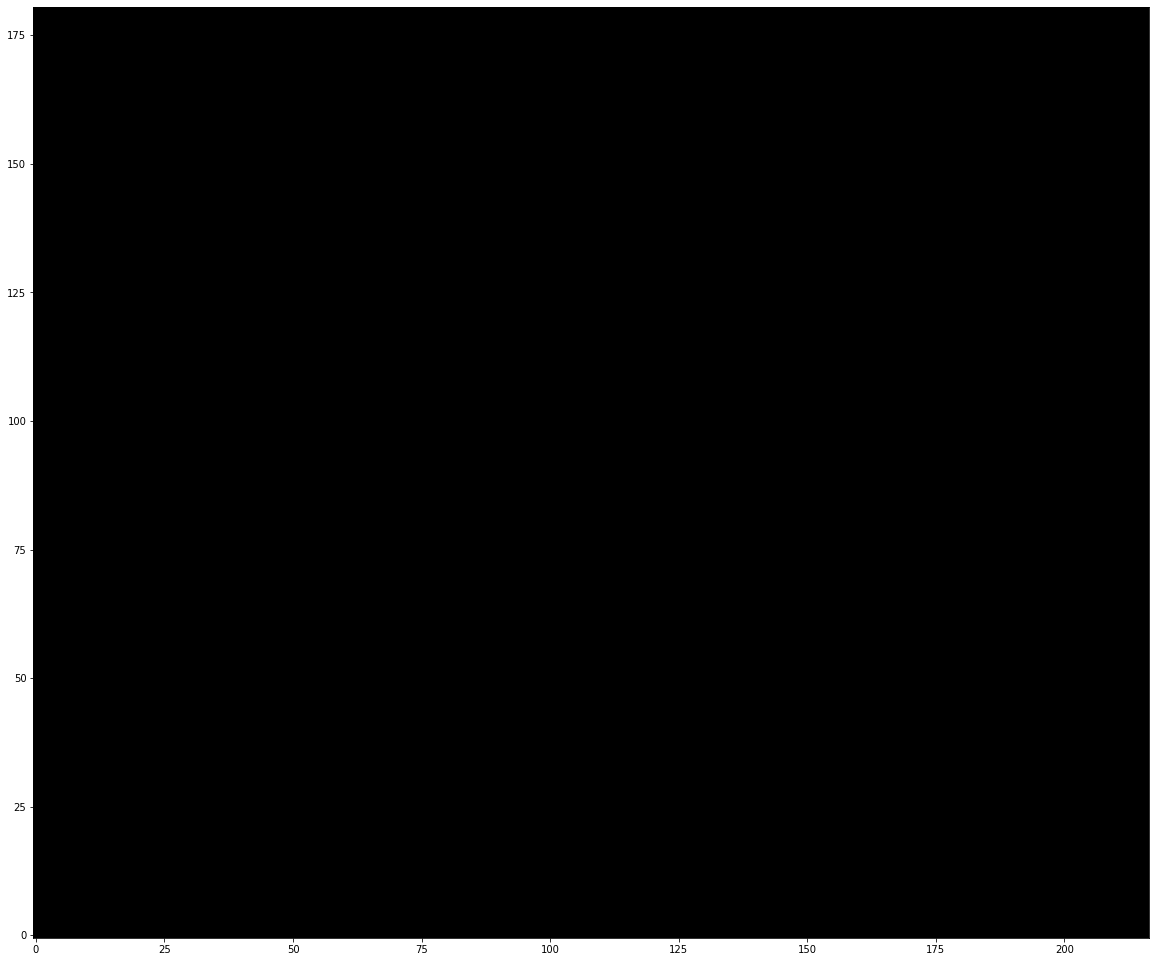

In [112]:
diff = compare_images(prettier_slice_in, prettier_slice_out, method='diff')
plt.imshow(diff, cmap='gray', origin='lower')